In [2]:
import pandas as pd

In [3]:
ca=pd.read_csv("2016-2022.csv")

In [4]:
ca.isnull().sum()

data_id                 0
iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1       30773
inter1                  0
actor2              76315
assoc_actor_2       96179
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                 18
admin3               2239
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
timestamp               0
iso3                    0
dtype: int64

In [5]:
ca['assoc_actor_2_backup'] = ca['assoc_actor_2'].copy()


In [6]:
ca.loc[(ca['actor2'].isna()) & (ca['event_type'] == 'Protests'), 'actor2'] = 'Civilians (India)'



In [7]:
ca.loc[(ca['assoc_actor_2'].isna()) & (ca['actor2'].notna()), 'assoc_actor_2'] = 'Related to ' + ca['actor2']


In [8]:
ca.isnull().sum()

data_id                     0
iso                         0
event_id_cnty               0
event_id_no_cnty            0
event_date                  0
year                        0
time_precision              0
event_type                  0
sub_event_type              0
actor1                      0
assoc_actor_1           30773
inter1                      0
actor2                   1950
assoc_actor_2            1950
inter2                      0
interaction                 0
region                      0
country                     0
admin1                      0
admin2                     18
admin3                   2239
location                    0
latitude                    0
longitude                   0
geo_precision               0
source                      0
source_scale                0
notes                       0
fatalities                  0
timestamp                   0
iso3                        0
assoc_actor_2_backup    96179
dtype: int64

C:\Users\sharm\AppData\Local\Temp\ipykernel_18076\3811857124.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette="viridis")


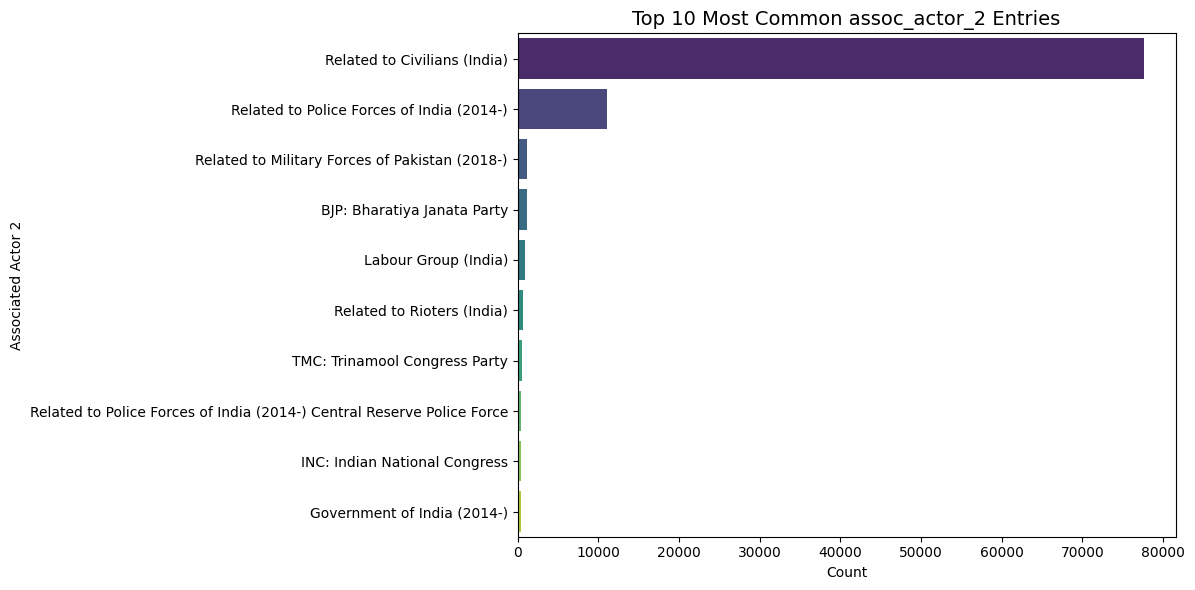

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent values
top_actors = ca['assoc_actor_2'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="viridis")
plt.title("Top 10 Most Common assoc_actor_2 Entries", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Associated Actor 2")
plt.tight_layout()
plt.show()


In [10]:
ca['assoc_actor_2_filled'] = ca['assoc_actor_2'].copy()

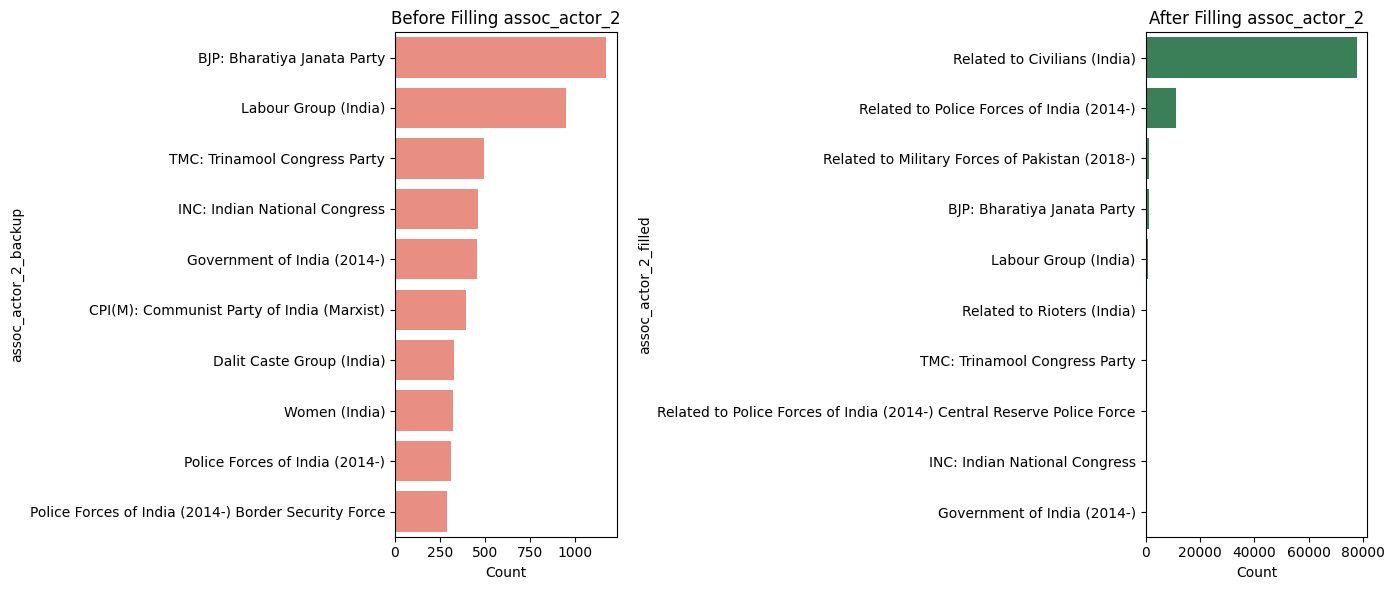

In [11]:
# Count top 10 values
before_fill = ca['assoc_actor_2_backup'].value_counts().head(10)
after_fill = ca['assoc_actor_2_filled'].value_counts().head(10)

# Plot
plt.figure(figsize=(14, 6))

# Before fill
plt.subplot(1, 2, 1)
sns.barplot(x=before_fill.values, y=before_fill.index, color="salmon")
plt.title("Before Filling assoc_actor_2")
plt.xlabel("Count")

# After fill
plt.subplot(1, 2, 2)
sns.barplot(x=after_fill.values, y=after_fill.index, color="seagreen")
plt.title("After Filling assoc_actor_2")
plt.xlabel("Count")

plt.tight_layout()
plt.show()